In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

2024-11-14 16:06:59.228053: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-14 16:06:59.240512: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-14 16:06:59.248549: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-14 16:06:59.250924: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-14 16:06:59.257060: I tensorflow/core/platform/cpu_feature_guar

In [2]:
def ClassCNN(xTrain, yTrain, xVal, yVal, xTest, yTest,
                 learnRate=0.0001,
                 hiddenLayers=1,
                 layerWidth=64,
                 outputActivation="softmax",
                 hiddenActivation="relu",
                 convActivation="relu",
                 optimiser=keras.optimizers.SGD,
                 epochs=50,
                 alpha=5,
                 inputShape=(28, 28, 1),
                 outputShape=10,
                 lossFunction=keras.losses.SparseCategoricalCrossentropy(from_logits=True)):

  CNNModel = Sequential()
  CNNModel.add(Conv2D(32, (3, 3), activation=convActivation, input_shape=inputShape))
  CNNModel.add(MaxPooling2D((2, 2)))
  CNNModel.add(Conv2D(64, (3, 3), activation=convActivation))
  CNNModel.add(MaxPooling2D((2, 2)))
  CNNModel.add(Conv2D(128, (3, 3), activation=convActivation))
  CNNModel.add(MaxPooling2D((2, 2)))
  CNNModel.add(Conv2D(256, (3, 3), activation=convActivation))

  CNNModel.add(Flatten())

  for i in range(hiddenLayers):
    CNNModel.add(Dense(layerWidth, activation=hiddenActivation))

  CNNModel.add(Dense(outputShape, activation=outputActivation))

  CNNModel.compile(optimizer=optimiser(learning_rate=learnRate),
                loss=lossFunction,
                metrics=['accuracy'])

  #CNNModel.summary()
  history = CNNModel.fit(xTrain, yTrain, epochs=epochs,
                      validation_data=(xVal, yVal))
  
  print(history.history)

  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
  plt.xlabel("Epochs")
  plt.show()

  val_loss, val_acc = CNNModel.evaluate(xVal,  yVal, verbose=2)
  test_loss, test_acc = CNNModel.evaluate(xTest,  yTest, verbose=2)

  print(f"Learning Rate: {learnRate}")
  print(f"Hidden layers: {hiddenLayers}")
  print(f"Layer Width: {layerWidth}")
  print(f"Optimiser: {optimiser}")
  print(f"Output Activation: {outputActivation}")
  print(f"Hidden Activation: {hiddenActivation}")
  print(f"Conv Activation: {convActivation}")
  print(f"Epochs: {epochs}")
  print(f"Validation loss: {val_loss}")
  print(f"Validation accuracy: {val_acc}")
  print(f"Test loss: {test_loss}")
  print(f"Test accuracy: {test_acc}")

  return test_acc, val_acc, CNNModel

24 Classes

In [ ]:
xSmallClock = np.load("data/75/images.npy")
ySmallClock = np.load("data/75/labels.npy")

ySmallClock = np.array([int(time[0] + (time[1] // 30)) for time in ySmallClock])  

xSmallClock = np.reshape(xSmallClock, (-1, 75, 75, 1))
xSmallClock = xSmallClock / 255.0

xTrain, xTest, yTrain, yTest = train_test_split(xSmallClock,
                                                ySmallClock,
                                                test_size=0.2)
xVal, xTest, yVal, yTest = train_test_split(xTest, yTest, test_size=0.5)

test_acc, val_acc = ClassCNN(xTrain, yTrain, xVal, yVal, xTest, yTest,
                                 learnRate=0.001,
                                hiddenLayers=2,
                                outputActivation="softmax",
                                hiddenActivation="relu",
                                convActivation="relu",
                                epochs=30,
                                optimiser=keras.optimizers.Adam,
                                inputShape=(75, 75, 1),
                                outputShape=24)

print(test_acc, val_acc)

720 Classes

Epoch 1/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 6.8069e-04 - loss: 6.5831 - val_accuracy: 0.0017 - val_loss: 6.5837
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 9.0682e-04 - loss: 6.5805 - val_accuracy: 0.0000e+00 - val_loss: 6.5874
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0019 - loss: 6.5796 - val_accuracy: 0.0000e+00 - val_loss: 6.5897
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0015 - loss: 6.5782 - val_accuracy: 0.0011 - val_loss: 6.5915
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0014 - loss: 6.5781 - val_accuracy: 0.0000e+00 - val_loss: 6.5938
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0014 - loss: 6.5777 - val_accuracy: 0.0000e+00 - val_loss: 6.5958
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0018 - loss: 6.5774 - val_accuracy: 0.0000e+00 - val_loss: 6.5967
Epoch 8/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.00

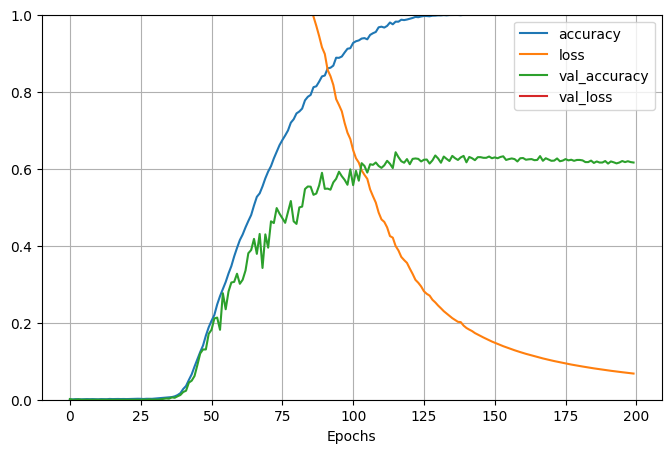

57/57 - 0s - 981us/step - accuracy: 0.6161 - loss: 1.2988
57/57 - 0s - 969us/step - accuracy: 0.6439 - loss: 1.2016
Learning Rate: 0.01
Hidden layers: 6
Layer Width: 346
Optimiser: <class 'keras.src.optimizers.adagrad.Adagrad'>
Output Activation: selu
Hidden Activation: softsign
Conv Activation: relu
Epochs: 200
Validation loss: 1.2987993955612183
Validation accuracy: 0.6161110997200012
Test loss: 1.201573371887207
Test accuracy: 0.6438888907432556
0.6438888907432556 0.6161110997200012


In [ ]:
def format_error_in_hours_and_minutes(error_in_hours):
    hours = int(error_in_hours)
    minutes = int((error_in_hours - hours) * 60)
    return f"{hours} hours and {minutes} minutes"

def plot_error_distribution(y_true, y_pred, num_bins=30):
    #y_true = y_true
    #y_pred = y_pred.ravel()
    
    y_pred = np.mod(y_pred, 12)

    linear_diff = np.abs(y_true - y_pred)
    circular_error = np.minimum(linear_diff, 12 - linear_diff)

    # for i in range(len(y_true)):
    #     print(f"y_true: {y_true[i]}, y_pred: {y_pred[i]}, linear_diff: {linear_diff[i]}, circular_error: {circular_error[i]}")

    plt.figure(figsize=(10, 6))
    plt.hist(circular_error, bins=num_bins, color='skyblue', edgecolor='black')
    plt.title('Distribution of mean common sense errors')
    plt.xlabel('Mean common sense error (hours)')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

    # Statistics of the error distribution
    mean_error_formatted = format_error_in_hours_and_minutes(np.mean(circular_error))
    median_error_formatted = format_error_in_hours_and_minutes(np.median(circular_error))
    max_error_formatted = format_error_in_hours_and_minutes(np.max(circular_error))

    print(f"Mean Error: {mean_error_formatted}")
    print(f"Median Error: {median_error_formatted}")
    print(f"Max Error: {max_error_formatted}")

/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1731596828.048539   67984 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731596828.083355   67984 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731596828.0834

Epoch 1/200


I0000 00:00:1731596829.253140   68115 service.cc:146] XLA service 0x7ff8d40043a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731596829.253157   68115 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2024-11-14 16:07:09.267756: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-14 16:07:09.339850: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-11-14 16:07:10.752997: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:762] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility

 49/450 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 6.5790

I0000 00:00:1731596831.013597   68115 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0011 - loss: 6.5818 - val_accuracy: 0.0011 - val_loss: 6.5854
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 8.1213e-04 - loss: 6.5804 - val_accuracy: 0.0017 - val_loss: 6.5889
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0016 - loss: 6.5795 - val_accuracy: 0.0017 - val_loss: 6.5913
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 6.9449e-04 - loss: 6.5785 - val_accuracy: 0.0000e+00 - val_loss: 6.5937
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0021 - loss: 6.5783 - val_accuracy: 5.5556e-04 - val_loss: 6.5955
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0014 - loss: 6.5778 - val_accuracy: 5.5556e-04 - val_loss: 6.5967
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0012 - loss: 6.5774 - val_accuracy: 0.0000e+00 - val_loss: 6.5983
Epoch 8/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0016 - loss: 6.576

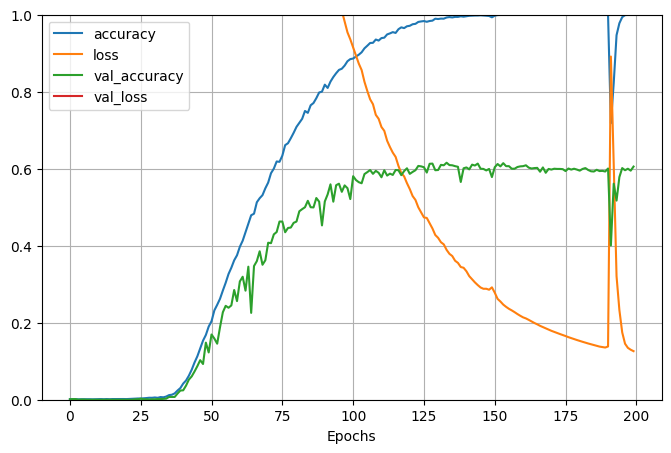

57/57 - 0s - 939us/step - accuracy: 0.6056 - loss: 1.2742
57/57 - 0s - 1ms/step - accuracy: 0.6139 - loss: 1.2626
Learning Rate: 0.01
Hidden layers: 6
Layer Width: 346
Optimiser: <class 'keras.src.optimizers.adagrad.Adagrad'>
Output Activation: selu
Hidden Activation: softsign
Conv Activation: relu
Epochs: 200
Validation loss: 1.2741975784301758
Validation accuracy: 0.605555534362793
Test loss: 1.2625867128372192
Test accuracy: 0.6138888597488403
0.6138888597488403 0.605555534362793


In [4]:
xSmallClock = np.load("data/75/images.npy")
ySmallClock = np.load("data/75/labels.npy")

ySmallClock = np.array([int((time[0] * 60) + time[1]) for time in ySmallClock])  

xSmallClock = np.reshape(xSmallClock, (-1, 75, 75, 1))
xSmallClock = xSmallClock / 255.0

xTrain, xTest, yTrain, yTest = train_test_split(xSmallClock,
                                                ySmallClock,
                                                test_size=0.2)
xVal, xTest, yVal, yTest = train_test_split(xTest, yTest, test_size=0.5)

test_acc, val_acc, model = ClassCNN(xTrain, yTrain, xVal, yVal, xTest, yTest,
                         learnRate=0.01,
                         hiddenLayers=6,
                         layerWidth=346,
                         outputActivation="selu",
                         hiddenActivation="softsign",
                         convActivation="relu",
                         epochs=200,
                         optimiser=keras.optimizers.Adagrad,
                         inputShape=(75, 75, 1),
                         outputShape=720)

print(test_acc, val_acc)

Common Sense Loss Evaluation

In [16]:
preds = []
for x in xTest:
    x = np.reshape(x, (-1, 75, 75, 1))
    preds.append(np.argmax(model.predict(x)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


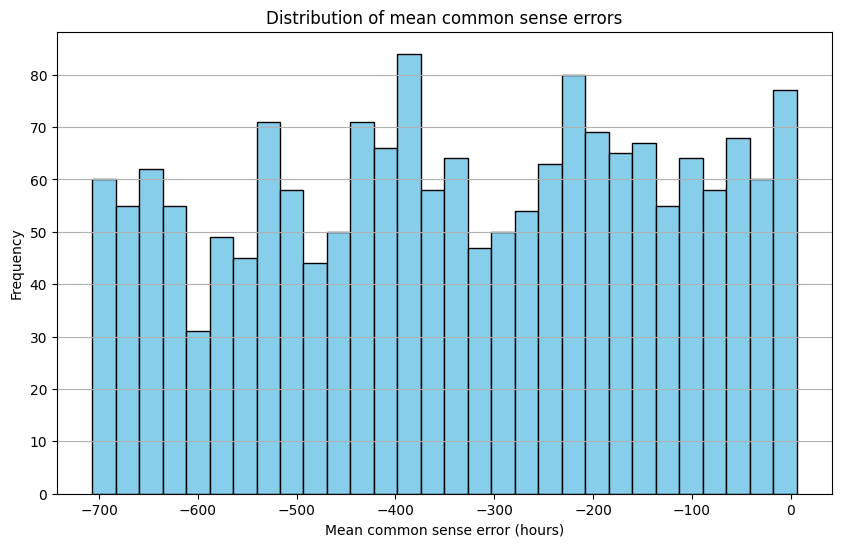

Mean Error: -336 hours and -43 minutes
Median Error: -336 hours and 0 minutes
Max Error: 6 hours and 0 minutes


In [19]:
plot_error_distribution(yTest, preds)

150x150 pixel images

/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1731579377.845678   10779 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731579381.949522   10779 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731579381.9498

Epoch 1/200


I0000 00:00:1731579390.076684   10963 service.cc:146] XLA service 0x78b380010520 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731579390.076702   10963 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2024-11-14 11:16:30.549804: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-14 11:16:31.273924: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  7/450 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.0000e+00 - loss: 6.5807  

I0000 00:00:1731579404.930696   10963 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


450/450 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.8212e-04 - loss: 6.5827 - val_accuracy: 5.5556e-04 - val_loss: 6.5839
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.0011 - loss: 6.5803 - val_accuracy: 5.5556e-04 - val_loss: 6.5869
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.0019 - loss: 6.5792 - val_accuracy: 5.5556e-04 - val_loss: 6.5913
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.0013 - loss: 6.5783 - val_accuracy: 0.0017 - val_loss: 6.5904
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.0016 - loss: 6.5783 - val_accuracy: 0.0000e+00 - val_loss: 6.5931
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.0014 - loss: 6.5778 - val_accuracy: 0.0017 - val_loss: 6.5946
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.0010 - loss: 6.5781 - val_accuracy: 5.5556e-04 - val_loss: 6.5959
Epoch 8/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.0013 - lo

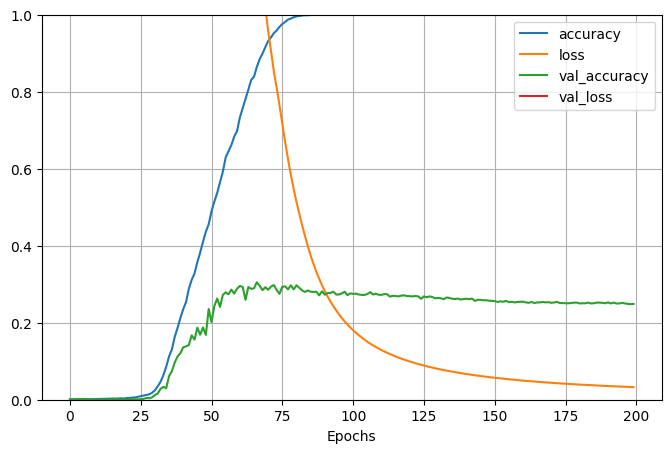

57/57 - 0s - 4ms/step - accuracy: 0.2489 - loss: 3.2734
57/57 - 0s - 4ms/step - accuracy: 0.2467 - loss: 3.3980
Learning Rate: 0.01
Hidden layers: 6
Layer Width: 346
Optimiser: <class 'keras.src.optimizers.adagrad.Adagrad'>
Output Activation: selu
Hidden Activation: softsign
Conv Activation: relu
Epochs: 200
Validation loss: 3.2734315395355225
Validation accuracy: 0.24888889491558075
Test loss: 3.3980140686035156
Test accuracy: 0.24666666984558105
0.24666666984558105 0.24888889491558075


In [6]:
xSmallClock = np.load("data/150/images.npy")
ySmallClock = np.load("data/150/labels.npy")

ySmallClock = np.array([int((time[0] * 60) + time[1]) for time in ySmallClock])  

xSmallClock = np.reshape(xSmallClock, (-1, 150, 150, 1))
xSmallClock = xSmallClock / 255.0

xTrain, xTest, yTrain, yTest = train_test_split(xSmallClock,
                                                ySmallClock,
                                                test_size=0.2)
xVal, xTest, yVal, yTest = train_test_split(xTest, yTest, test_size=0.5)

test_acc, val_acc = ClassCNN(xTrain, yTrain, xVal, yVal, xTest, yTest,
                         learnRate=0.01,
                         hiddenLayers=6,
                         layerWidth=346,
                         outputActivation="selu",
                         hiddenActivation="softsign",
                         convActivation="relu",
                         epochs=125,
                         optimiser=keras.optimizers.Adagrad,
                         inputShape=(150, 150, 1),
                         outputShape=720)

print(test_acc, val_acc)